In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
df=pd.read_csv("play_tennis.csv")
df.describe()
print(df.head())

  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes


In [14]:
lm=LabelEncoder()
df['outlook']=lm.fit_transform(df['outlook'])
df['temp']=lm.fit_transform(df['temp'])
df['humidity']=lm.fit_transform(df['humidity'])
df['wind']=lm.fit_transform(df['wind'])

In [15]:
features=["outlook","temp","humidity","wind"]
x=df[features]
y=df["play"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state=0);
print(x_train.shape,x_test.shape)

(8, 4) (6, 4)


In [17]:
dtree=DecisionTreeClassifier()
dtree=dtree.fit(x_train,y_train)

In [18]:
x_train_pred=dtree.predict(x_train)
y_test_pred=dtree.predict(x_test)
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

0.5


array([[0, 1],
       [2, 3]], dtype=int64)

In [19]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.75      0.60      0.67         5

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6



In [20]:

text_rep=export_text(dtree,feature_names=features)
print("Decision Tree Representation")
print(text_rep)

Decision Tree Representation
|--- temp <= 1.50
|   |--- outlook <= 0.50
|   |   |--- class: Yes
|   |--- outlook >  0.50
|   |   |--- class: No
|--- temp >  1.50
|   |--- humidity <= 0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- class: Yes
|   |   |--- outlook >  1.50
|   |   |   |--- class: No
|   |--- humidity >  0.50
|   |   |--- class: Yes



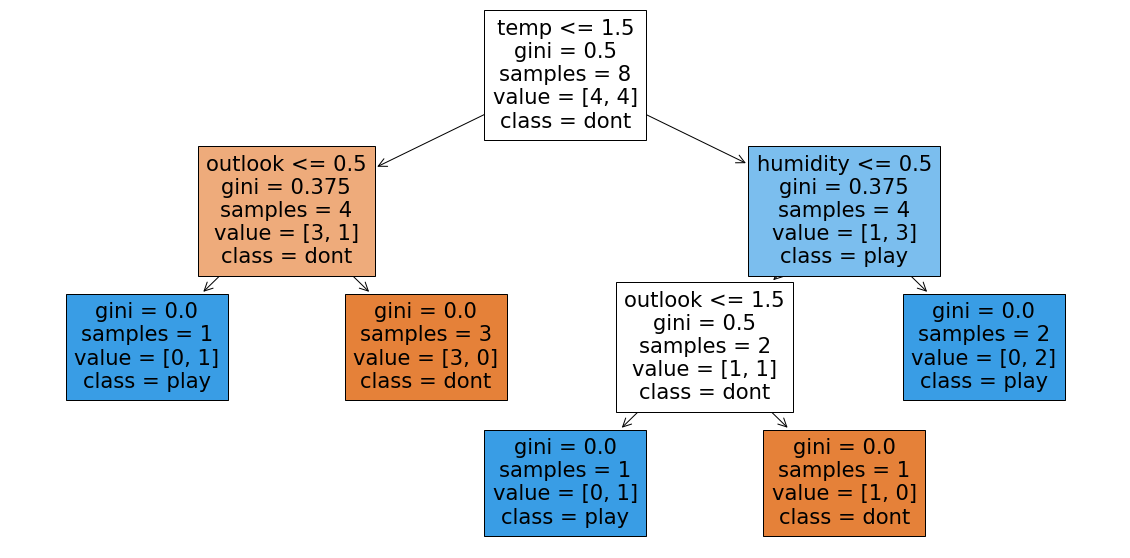

In [22]:
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names=features,class_names=['dont','play'],filled=True)
plt.show()

In [23]:
with open("play_tennis.txt","w") as f:
    f=tree.export_graphviz(dtree,out_file=f)